In [50]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='./sims.TNG/TNG50-1/output'
h = 0.6774

Critial_Density = 1.27e-8

In [48]:
def batch_distance_calculation(pos1, pos2, boxsize=None):
    # 计算每个点与目标点的距离
    dxs = np.abs(pos1[:, 0] - pos2[0])
    dys = np.abs(pos1[:, 1] - pos2[1])
    dzs = np.abs(pos1[:, 2] - pos2[2])

    # 考虑周期性边界条件
    if boxsize is not None:
        dxs2 = np.abs(boxsize - dxs)
        dys2 = np.abs(boxsize - dys)
        dzs2 = np.abs(boxsize - dzs)

        # 在周期性边界条件下，选择最短的距离
        dxs = np.minimum(dxs, dxs2)
        dys = np.minimum(dys, dys2)
        dzs = np.minimum(dzs, dzs2)

    # 计算三维空间点之间的欧氏距离
    distances = np.linalg.norm(np.vstack([dxs, dys, dzs]).T, axis=1)

    return distances

In [ ]:
def draw_HI(sp,i,r):
    h=0.6774
    center=il.groupcat.loadSingle(basePath, sp, -1,i)['SubhaloPos']/h
    Gas_Dict=il.snapshot.loadSubhalo(basePath, sp,i, 'gas', fields=['Coordinates','NeutralHydrogenAbundance','Masses'])
    GasCoordinates = Gas_Dict['Coordinates']/h
    Masses = Gas_Dict['Masses']/h
    NeutralHydrogenAbundance = Gas_Dict['NeutralHydrogenAbundance']
    Masses = Masses * NeutralHydrogenAbundance

    plt.figure(figsize=(10, 10), dpi=400)

    plt.style.use("dark_background")

    h, _, _, image = plt.hist2d(GasCoordinates[:, 1],
                            GasCoordinates[:, 2],
                            weights=Masses,
                            norm=mpl.colors.LogNorm(),
                            bins=(500, 500),
                            cmap='gray')
    plt.xlabel('y [ckpc]')
    plt.ylabel('z [ckpc]')
    draw_circle = plt.Circle(( center[1],  center[2]), r, fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    plt.colorbar(image)
    plt.gca().set_aspect(1)
    plt.show()

In [ ]:
Full_Snapshots=np.array([99,91,84,78,72,67,59,50])

In [ ]:
Radius=np.array([159.9037788583252,
 105.46302033517655,
 94.36874100902322,
 80.65831766084709,
 28.93877439460174,
 41.30414407522569,
 52.84019410778173,
 93.3510284375349])

In [109]:
Subhalo_Index=329508
Current_Snapshot=99
Subhalo_Tree=il.sublink.loadTree(basePath, Current_Snapshot, Subhalo_Index,fields=['SnapNum','SubfindID','SubhaloMass'],onlyMPB=True)

In [110]:
for Current_Snapshot in Full_Snapshots:
    Subhalo_Index=Subhalo_Tree['SubfindID'][np.where(Subhalo_Tree['SnapNum']==Current_Snapshot)][0]
    print(Current_Snapshot,',',Subhalo_Index,Subhalo_Tree['SubhaloMass'][np.where(Subhalo_Tree['SnapNum']==Current_Snapshot)][0])

99 , 329508 775.5652
91 , 309873 735.6168
84 , 280379 707.8804
78 , 262399 707.82477
72 , 241928 678.10657
67 , 211991 589.5966
59 , 158822 464.13654
50 , 153494 373.97388


In [101]:
sp,i=50 , 153494
print(il.groupcat.loadSingle(basePath, sp, -1,i)['SubhaloMassType'][0]/h)
Gas_Dict=il.snapshot.loadSubhalo(basePath, sp,i, 'gas', fields=['Coordinates','NeutralHydrogenAbundance','Masses'])
Masses = Gas_Dict['Masses']/h
GasCoordinates = Gas_Dict['Coordinates']/h
NeutralHydrogenAbundance = Gas_Dict['NeutralHydrogenAbundance']
Masses = Masses * NeutralHydrogenAbundance
Subhalo_Center=il.groupcat.loadSingle(basePath, sp, -1,i)['SubhaloPos']/h
Particles_Distance=batch_distance_calculation(Gas_Dict['Coordinates']/h,Subhalo_Center,51700)
Particles_Distance_Sorted=np.sort(Particles_Distance)
Particles_Masses_Sorted=Masses[np.argsort(Particles_Distance)]
Masses_Cumulative=np.cumsum(Particles_Masses_Sorted)
Density_Cumulative=Masses_Cumulative/(4/3*np.pi*np.power(Particles_Distance_Sorted,3))
Density_Cumulative_Normalized=Density_Cumulative/Critial_Density/200


print(np.sum(Masses))

37.68960599671221
3.9340565


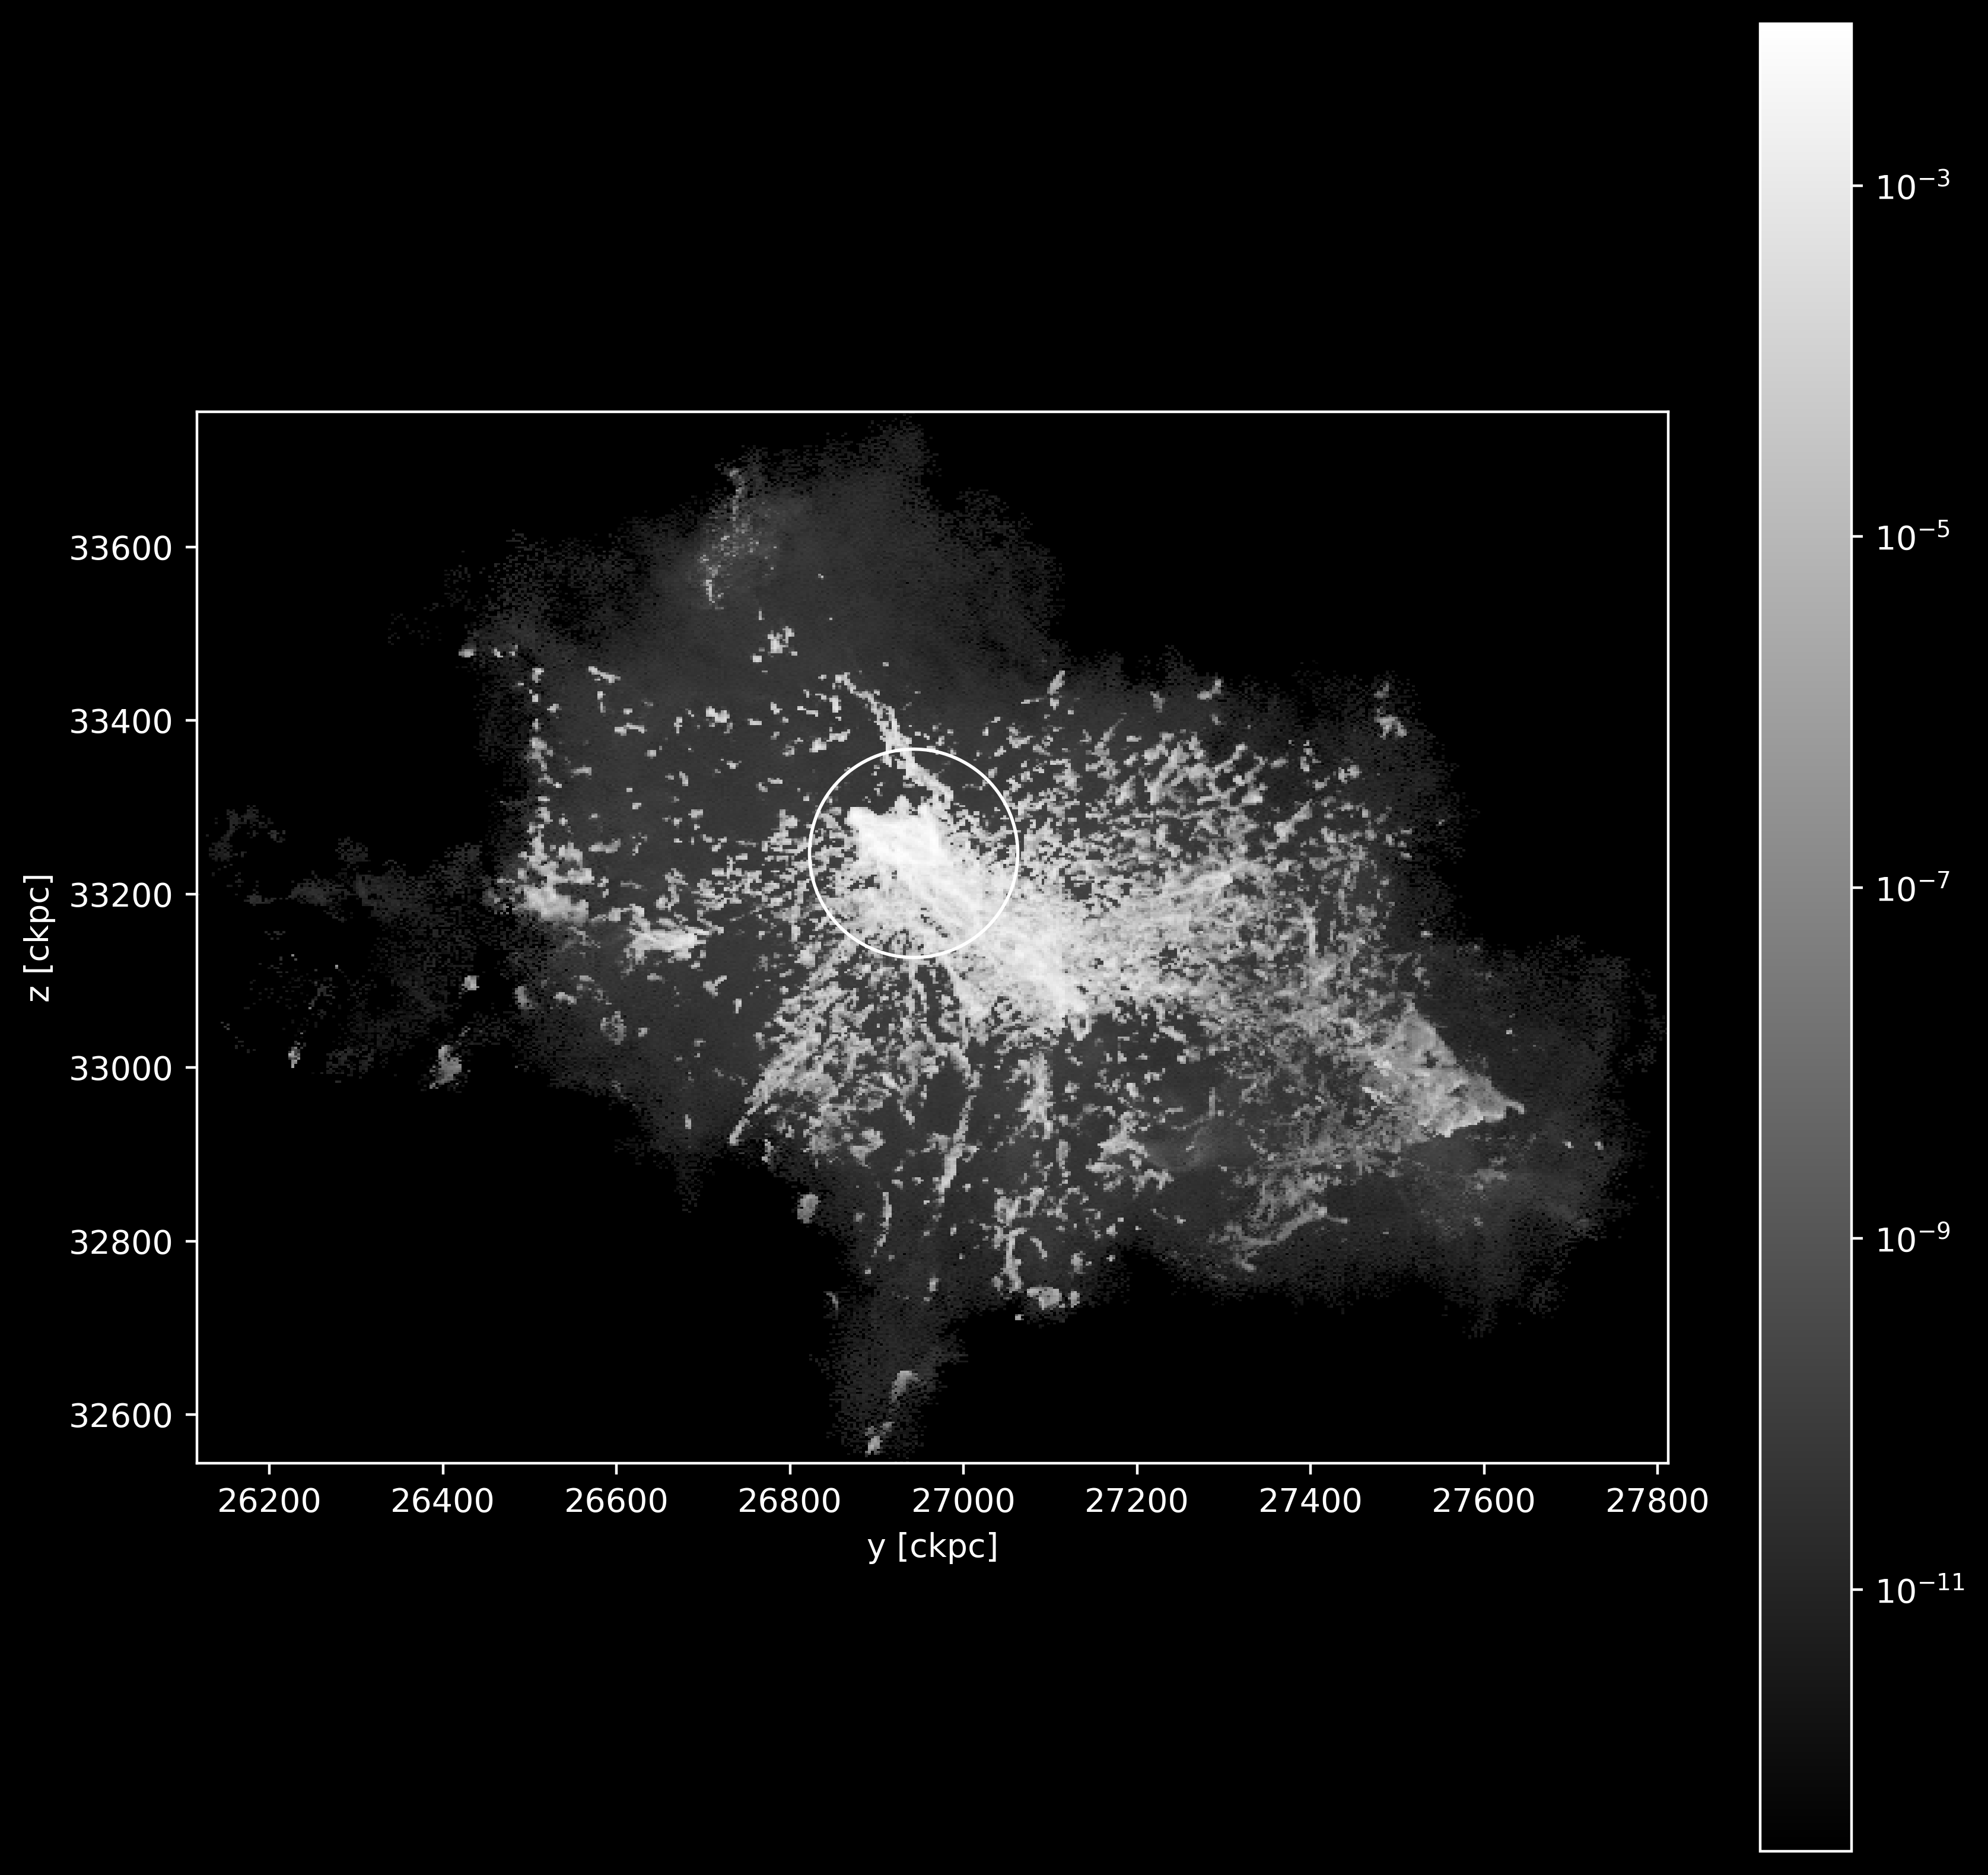

In [103]:
draw_HI(sp , i,120)

In [102]:
Particles_Distance_Sorted[np.argmax(Density_Cumulative_Normalized):][np.where(Density_Cumulative_Normalized[np.argmax(Density_Cumulative_Normalized):]<0.15)[0][0]]

118.30532052404062

In [111]:
Gas_Mass = np.array([77.3, 77.71, 74.04, 76.94, 75.82, 63, 48.68, 37.69])
HI_Mass = np.array([10.31, 7.38, 6.53, 4.94, 1.49, 1.92, 1.94, 3.93])
SH_Mass = np.array([775.5652, 735.6168,
                   707.8804,
                   707.82477,
                   678.10657,
                   589.5966,
                   464.13654, 373.97388])
Ratio = np.array([0.15, 0.23, 0.4, 0.6, 0.8, 0.5, 0.3, 0.15])

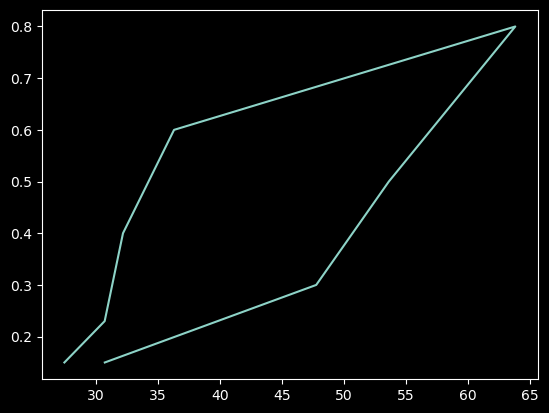

In [119]:
plt.plot(SH_Mass/np.sqrt(HI_Mass*Gas_Mass),Ratio, label='Gas Mass')